<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 12

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Introduction:
In this lab you will fit regression models on multiple datasets.

## Exercise 1: Synthetic Data
First we will fit a regression model to multiple variants of a synthetic dataset. In each case, we know the true parameters (slope and intercept) and we will vary the noise of the data. Execute the following code to generate the data:

In [2]:
import numpy as np

w_0_true = -2.5 # this is the TRUE intercept
w_1_true = 0.1 # this is the TRUE slope

def f_x(x, w_0, w_1, sig):
  n = len(x)
  y = w_1*x + w_0 + np.random.normal(0, sig, n)
  return y

x = np.arange(0, 100)


y_1 = f_x(x, w_0_true, w_1_true, sig=0.5) # standard deviation = 0.5
y_2 = f_x(x, w_0_true, w_1_true, sig=1.5) # standard deviation = 1.5
y_3 = f_x(x, w_0_true, w_1_true, sig=5.0) # standard deviation = 5
y_4 = f_x(x, w_0_true, w_1_true, sig=10.0) # standard deviation = 10

### Question 1a:
For each of the four datasets we generated do the following:

* Plot a scatter plot of `x` and `y_i` (e.g, `x` and `y_2`)

* Fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using sklearn (sklearn.linear_model.LinearRegression )

  * Make sure `fit_intercept` is set to `True`

  * hint: sklearn expects the features to be two-dimensional. You many need to use the following code to reshape your `x` array when training:

```
  reg = LinearRegression(fit_intercept=True)
  reg.fit(x.reshape(-1, 1), y) # reshape x to be two-dimensional
```
* Print the estimated coefficients:

  * These can be accessed with the `coef_` and `intercept_` attributes on the regression object

* Plot the regression line on the scatter plots of `x` and `y`

Comment on how well the regression model approximates the data


Dataset 1 - Coefficients:
Intercept: -2.574855344506198
Slope: 0.10021115739389277


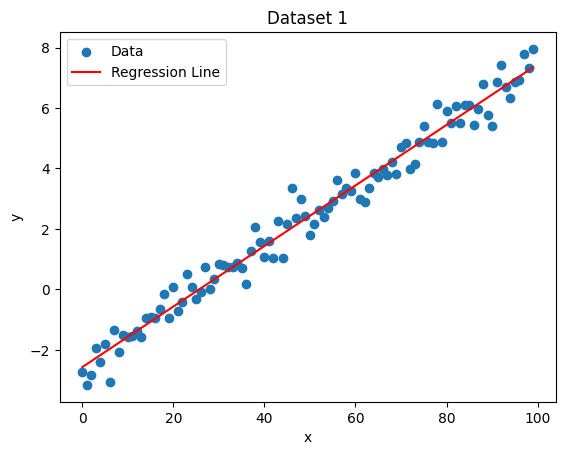


Dataset 2 - Coefficients:
Intercept: -2.4146277917897665
Slope: 0.10095225216577128


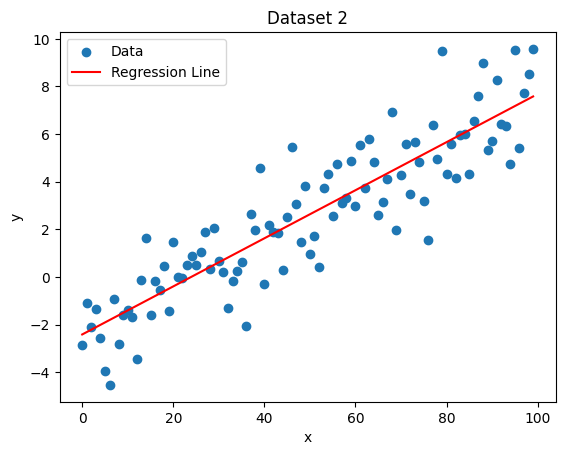


Dataset 3 - Coefficients:
Intercept: -1.7686528704976445
Slope: 0.092270190842595


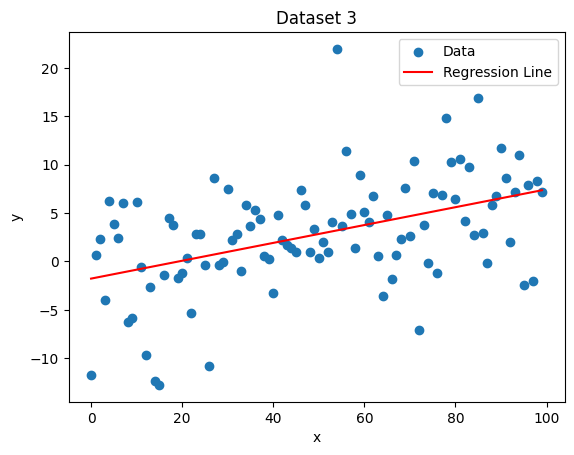


Dataset 4 - Coefficients:
Intercept: -4.156556014598015
Slope: 0.10277626488459389


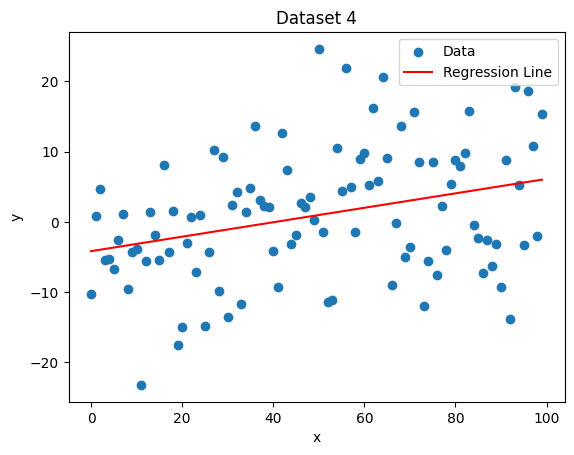

In [27]:
# Write your code for question 1a here
def plot_scatter_and_regression(x, y, reg, title):
    plt.scatter(x, y, label='Data')
    plt.plot(x, reg.predict(x.reshape(-1, 1)), color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

datasets = [(x, y_1, 'Dataset 1'), (x, y_2, 'Dataset 2'), (x, y_3, 'Dataset 3'), (x, y_4, 'Dataset 4')]

for x_data, y_data, title in datasets:
    reg = LinearRegression(fit_intercept=True)
    reg.fit(x_data.reshape(-1, 1), y_data)

    print(f"\n{title} - Coefficients:")
    print(f"Intercept: {reg.intercept_}")
    print(f"Slope: {reg.coef_[0]}")

    plot_scatter_and_regression(x_data, y_data, reg, title)

### Question 1b:

What do you observe as we add noise to our generated dataset? How well are we able to recover the true parameters, `w_0_true` and `w_1_true` from the data as noise increases?

As the noise in the data increases the fit line doesnt fit the data as well as it does for Dataset 1. I also noticed that there was not a very big jump between Dataset 1 and 2 but there were big jumps in accurcacy between datasets 2 3 and 4. As the noise increased we were not able to recover the true parameters as accurately.

# Exercise 2
Read the California Housing Data from the `sample_data` on every collab instance:

In [7]:
import pandas as pd
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

This dataset contains features on census tracts in California in the early 1990’s. The target is the variable `median_house_value` of each census tract.

### Exercise 2a:
Plot a [scatter_plot matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) using the training data. You may need to tune the `fig_size` argument to make the figure larger.

<ipython-input-10-de51e1c19fa1>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(train, alpha=0.2, ax=axes)


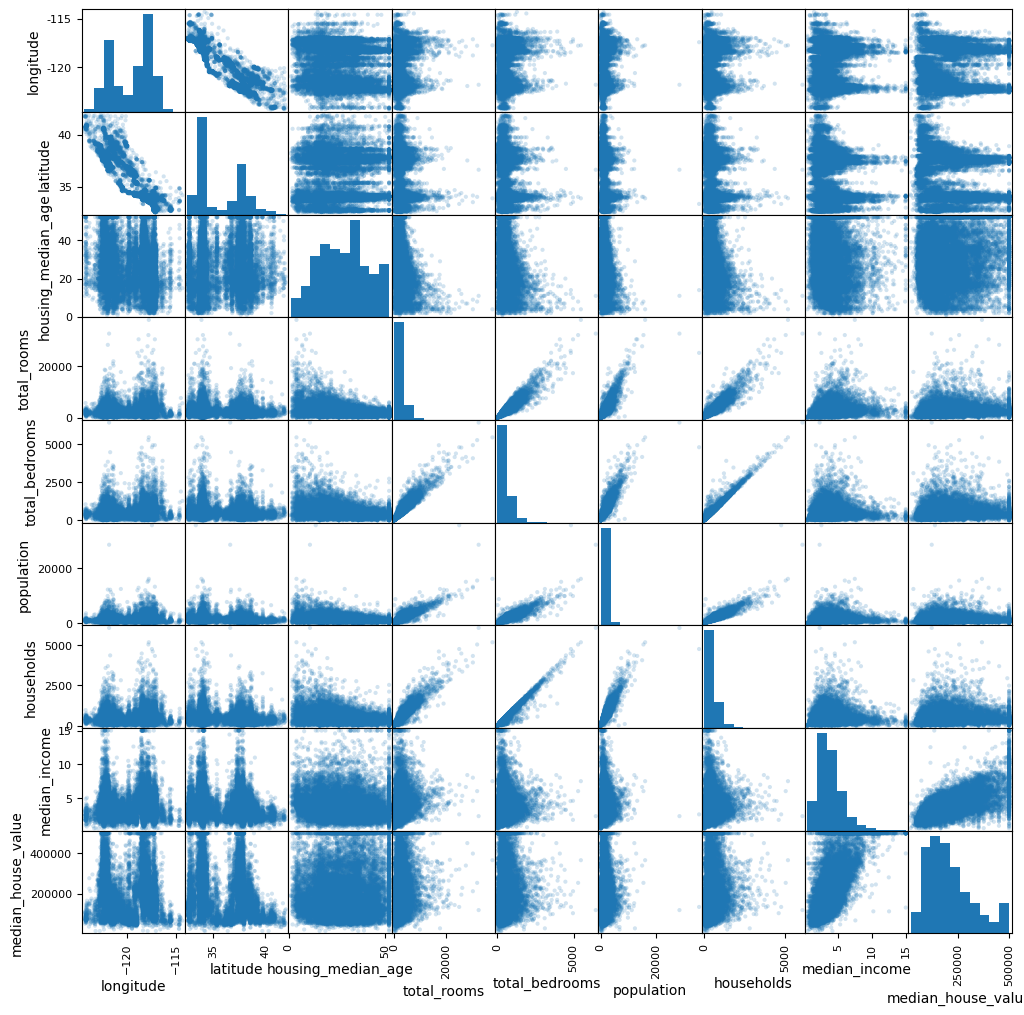

In [10]:
# Enter your code to plot the scatter_plot matrix here.
from pandas.plotting import scatter_matrix

fig, axes = plt.subplots(figsize=(12, 12))
scatter_matrix(train, alpha=0.2, ax=axes)
plt.show()

What variables appear to be correlated with `median_house_value`?

median_income

What variables are not correlated with `median_house_value`?

longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households

What features appear to be correlated with each other?

latitude and longitude appear to be correlated with each other

total_rooms seem to be correlated with total_bedrooms, population, and households

total_bedrooms seem to be correlated with total_rooms, population, and households

population seems to be correlated with total_rooms, total_bedrooms, and households

households appears to be correlated with total_rooms, total_bedrooms, and population

median_income appears to be correlated with median_house_value

### Exercise 2b
Fit a linear regression model using `sklearn`.
* Fit a few different models (each with different features).
* Evaluate the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) of your models with both the training and test set.

In [28]:
# Enter your code for exercise 2b here.

feature_sets = [
    ['longitude'],
    ['latitude'],
    ['housing_median_age'],
    ['total_rooms'],
    ['total_bedrooms'],
    ['population'],
    ['households'],
    ['median_income'],
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
]

def fit_and_evaluate_model(features, X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train[features], y_train)

    y_train_pred = model.predict(X_train[features])
    y_test_pred = model.predict(X_test[features])

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return rmse_train, rmse_test

X_train, y_train = train.drop('median_house_value', axis=1), train['median_house_value']
X_test, y_test = test.drop('median_house_value', axis=1), test['median_house_value']

for features in feature_sets:
    rmse_train, rmse_test = fit_and_evaluate_model(features, X_train, y_train, X_test, y_test)
    print(f"Features: {features}")
    print(f"Root Mean Squared Error (Train): {rmse_train}")
    print(f"Root Mean Squared Error (Test): {rmse_test}")
    print("-" * 40)

Features: ['longitude']
Root Mean Squared Error (Train): 115862.95903854334
Root Mean Squared Error (Test): 112967.18141588468
----------------------------------------
Features: ['latitude']
Root Mean Squared Error (Train): 114756.04779228837
Root Mean Squared Error (Test): 112025.67673447944
----------------------------------------
Features: ['housing_median_age']
Root Mean Squared Error (Train): 115317.53295829361
Root Mean Squared Error (Test): 112658.19659776475
----------------------------------------
Features: ['total_rooms']
Root Mean Squared Error (Train): 114981.007852097
Root Mean Squared Error (Test): 111685.50708921655
----------------------------------------
Features: ['total_bedrooms']
Root Mean Squared Error (Train): 115858.73678247788
Root Mean Squared Error (Test): 112798.71474863458
----------------------------------------
Features: ['population']
Root Mean Squared Error (Train): 115935.36564169593
Root Mean Squared Error (Test): 113144.88470214666
-------------------

What did you observe? Which model yields the lowest test error?

The train and testing data Root Mean Squared Errors are all very close to each other. The one that has the lowest test error is 'median_income'

### Exercise 2c
Fit a linear regression using the `statsmodels` api.
* Print the model output using `print(results.summary())`

In [26]:
#Enter your code for exercise 2c here.
train = pd.read_csv("sample_data/california_housing_train.csv")

X = train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = train['median_house_value']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:06:45   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.621e+06   6.92

Comment on which features appear to have the strongest relationship with `median_house_value`?

- median_income has a relatively large coefficient and it is positive which shows a strong positive relationship between median income and median house values
- the coefficient for housing_median_age is positive (1150.6949), indicating a positive relationship. However, its magnitude is smaller compared to median_income.
- total_rooms, total_bedrooms, population, households have negative coefficients, suggesting a negative relationship. However, interpreting these coefficients requires caution, as the scale of these features might influence their impact.
- both longitude and latitude have negative coefficients, indicating a negative relationship.

Write a sentence interpreting the coefficient for `median_income`.

The coefficient for median_income is 4.051e+04. In this context, it implies that, on average, a one-unit increase in median income is associated with an increase of approximately $40,510 in median house value, assuming all other variables remain constant.